*Fashion* Product Images (Small Dataset)

Download Dataset from : https://drive.google.com/file/d/1IJHl6YctfkI2MG1CH1VeHtsGiJAY8lXj/view


In [ ]:
!gdown --id 1IJHl6YctfkI2MG1CH1VeHtsGiJAY8lXj


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1IJHl6YctfkI2MG1CH1VeHtsGiJAY8lXj
To: /content/Fashion Product Images (Small).zip
100% 593M/593M [00:04<00:00, 126MB/s]


Unzip compressed file

In [ ]:
!unzip '/content/Fashion Product Images (Small).zip'


Loading Data

In [ ]:
# IMport Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os


import PIL
import tensorflow as tf
import matplotlib.image as image
import seaborn as sns
import pickle 

from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
import random
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

import warnings
warnings.filterwarnings('ignore')


In [ ]:
#reading the styles.csv file
df = pd.read_csv('/content/styles.csv', header = 'infer',error_bad_lines = False)
df

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [ ]:
df = df[['id','articleType']] # filtering to 2 columns of our interest

In [ ]:
df['articleType'].value_counts()


Tshirts                7067
Shirts                 3217
Casual Shoes           2845
Watches                2542
Sports Shoes           2036
                       ... 
Shoe Laces                1
Mens Grooming Kit         1
Body Wash and Scrub       1
Suits                     1
Ipad                      1
Name: articleType, Length: 143, dtype: int64

In [ ]:
df['articleType'].nunique()


143

Remove article Type classes which is in article Type column that is less than 1000




In [ ]:
vc=df['articleType'].value_counts()
indx= vc.index
valu = vc.values
for i in range(len(vc)):

    if valu[i] <1000:
        break

cloth_used = indx[:i]
print('Base cloth used: ',cloth_used)

Base cloth used:  Index(['Tshirts', 'Shirts', 'Casual Shoes', 'Watches', 'Sports Shoes',
       'Kurtas', 'Tops', 'Handbags', 'Heels', 'Sunglasses'],
      dtype='object')


10 classes remained

In [ ]:
# Removing all the examples with labels other than the selected ones
 
df = df[df['articleType'].isin(cloth_used)]
df

,id,articleType
0,15970,Shirts
2,59263,Watches
4,53759,Tshirts
5,1855,Tshirts
6,30805,Shirts
...,...,...
44417,12544,Tshirts
44418,42234,Tops
44419,17036,Casual Shoes
44421,18842,Tshirts


In [ ]:
df['articleType'].value_counts()


Tshirts         7067
Shirts          3217
Casual Shoes    2845
Watches         2542
Sports Shoes    2036
Kurtas          1844
Tops            1762
Handbags        1759
Heels           1323
Sunglasses      1073
Name: articleType, dtype: int64

Load Images and visualize some images

In [ ]:
base_path='/content/images/'


In [ ]:
df['path']=df['id'].apply(lambda x: str(base_path + str(x)+ '.jpg'))


In [ ]:
df=df.reset_index()


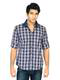

In [ ]:
image.load_img(df['path'][0])


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=2022)

In [ ]:
test_df['articleType'].value_counts()


Tshirts         1424
Shirts           650
Casual Shoes     559
Watches          496
Sports Shoes     426
Handbags         370
Kurtas           347
Tops             337
Heels            272
Sunglasses       213
Name: articleType, dtype: int64

(80, 60, 3)
(80, 60, 3)
(80, 60, 3)
(80, 60, 3)
(80, 60, 3)
(80, 60, 3)


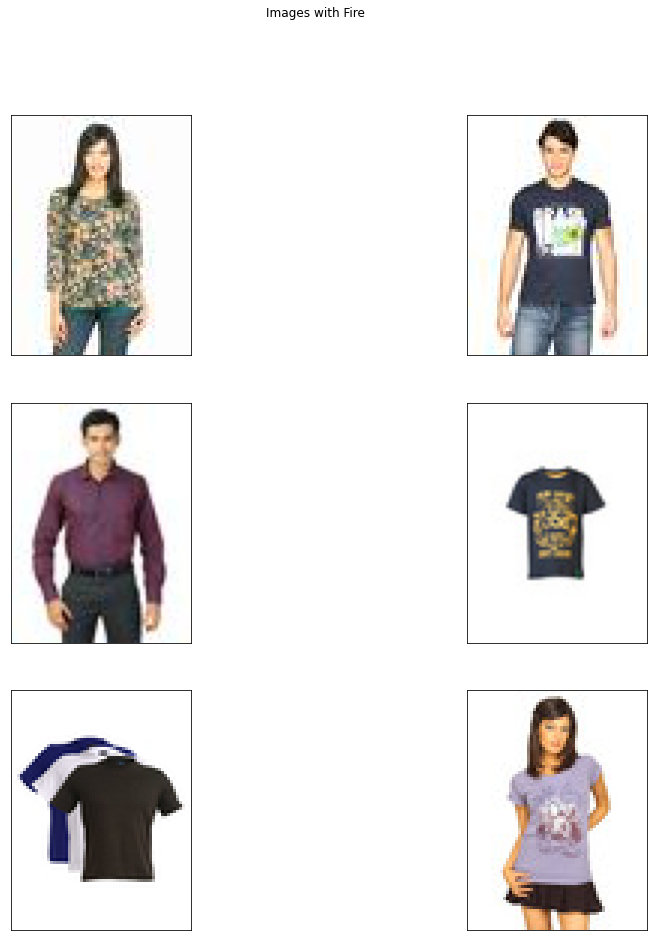

In [ ]:
pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = df.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    print(img.shape)
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

Make data generator

In [ ]:
generator = ImageDataGenerator(
    rescale = 1/255,
    validation_split=0.2,
)

In [ ]:
test_generator=ImageDataGenerator(
    rescale = 1/255
)

In [ ]:
train_gen = generator.flow_from_dataframe(train_df,x_col='path',y_col='articleType',
                                          target_size=(80,60),
                                          batch_size=32,
                                          subset='training')
val_gen = generator.flow_from_dataframe(train_df,x_col='path',y_col='articleType',
                                        target_size=(80,60),
                                        batch_size=32,
                                        subset='validation')

Found 16297 validated image filenames belonging to 10 classes.
Found 4074 validated image filenames belonging to 10 classes.


In [ ]:
test_gen = test_generator.flow_from_dataframe(test_df,x_col='path',y_col='articleType',
                                              target_size=(80,60),
                                              batch_size=32
                                             )

Found 5094 validated image filenames belonging to 10 classes.


In [ ]:
train_gen[0][1][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

I have Tried three models:
The First Model

In [ ]:
model = tf.keras.Sequential([
    Flatten(input_shape=(80, 60, 3)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(10,activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy']
              )

In [ ]:
history=model.fit(
        train_gen,
        epochs=15,
        validation_data=val_gen
        )

Epoch 1/15
510/510 [==============================] - 14s 21ms/step - loss: 0.7383 - accuracy: 0.7650 - val_loss: 0.8639 - val_accuracy: 0.6942
Epoch 2/15
510/510 [==============================] - 10s 20ms/step - loss: 0.4517 - accuracy: 0.8355 - val_loss: 0.9219 - val_accuracy: 0.6308
Epoch 3/15
510/510 [==============================] - 10s 20ms/step - loss: 0.3914 - accuracy: 0.8576 - val_loss: 1.7624 - val_accuracy: 0.5287
Epoch 4/15
510/510 [==============================] - 11s 21ms/step - loss: 0.3439 - accuracy: 0.8743 - val_loss: 2.2172 - val_accuracy: 0.5336
Epoch 5/15
510/510 [==============================] - 12s 23ms/step - loss: 0.3161 - accuracy: 0.8846 - val_loss: 5.8617 - val_accuracy: 0.3152
Epoch 6/15
510/510 [==============================] - 10s 20ms/step - loss: 0.3063 - accuracy: 0.8894 - val_loss: 1.5393 - val_accuracy: 0.5623
Epoch 7/15
510/510 [==============================] - 10s 20ms/step - loss: 0.2854 - accuracy: 0.8930 - val_loss: 3.3971 - val_accuracy:

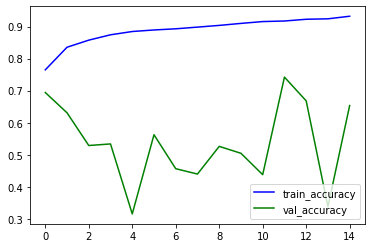

In [ ]:
hist=history.history
plt.plot(hist["accuracy"],color="b",label="train_accuracy")
plt.plot(hist["val_accuracy"],color="g",label="val_accuracy")
plt.legend(loc="lower right")
plt.show()

In [ ]:
model.evaluate(val_gen)


128/128 [==============================] - 2s 15ms/step - loss: 1.2741 - accuracy: 0.6534


[1.274100661277771, 0.653411865234375]

In [ ]:
model.evaluate(test_gen)


160/160 [==============================] - 3s 16ms/step - loss: 1.2978 - accuracy: 0.6470


[1.2978190183639526, 0.6470357179641724]

The Second Model

In [ ]:
input_layer=Input(shape=(80,60,3))
layer=Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="valid")(input_layer)
layer=MaxPool2D(pool_size=(2,2),strides=(1,1))(layer)
layer=BatchNormalization()(layer)

layer=Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="valid")(input_layer)
layer=MaxPool2D(pool_size=(2,2),strides=(1,1))(layer)
layer=BatchNormalization()(layer)

layer=Flatten()(layer)

layer=Dense(64,activation="relu")(layer)
layer=BatchNormalization()(layer)

layer=Dense(32,activation="relu")(layer)
output_layer=Dense(10,activation="softmax")(layer)
model2=Model(inputs=input_layer,outputs=output_layer)
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 60, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 78, 58, 16)        448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 77, 57, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 77, 57, 16)       64        
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 70224)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                449440

In [ ]:
model2.compile(loss='categorical_crossentropy',
       optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
       metrics=['accuracy'])

In [ ]:
history2 = model2.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen)

Epoch 1/15
510/510 [==============================] - 19s 21ms/step - loss: 0.6605 - accuracy: 0.8111 - val_loss: 0.5303 - val_accuracy: 0.8579
Epoch 2/15
510/510 [==============================] - 11s 22ms/step - loss: 0.3307 - accuracy: 0.8970 - val_loss: 0.5473 - val_accuracy: 0.8488
Epoch 3/15
510/510 [==============================] - 10s 20ms/step - loss: 0.2290 - accuracy: 0.9280 - val_loss: 0.3653 - val_accuracy: 0.8694
Epoch 4/15
510/510 [==============================] - 11s 21ms/step - loss: 0.1651 - accuracy: 0.9485 - val_loss: 0.3053 - val_accuracy: 0.8952
Epoch 5/15
510/510 [==============================] - 11s 21ms/step - loss: 0.1194 - accuracy: 0.9631 - val_loss: 0.3171 - val_accuracy: 0.8994
Epoch 6/15
510/510 [==============================] - 11s 21ms/step - loss: 0.0936 - accuracy: 0.9726 - val_loss: 0.3151 - val_accuracy: 0.9028
Epoch 7/15
510/510 [==============================] - 10s 20ms/step - loss: 0.0724 - accuracy: 0.9803 - val_loss: 0.3165 - val_accuracy:

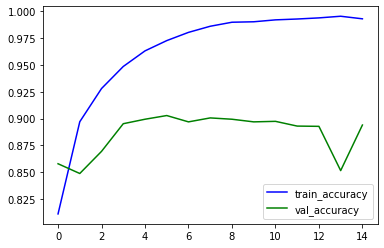

In [ ]:
hist=history2.history
plt.plot(hist["accuracy"],color="b",label="train_accuracy")
plt.plot(hist["val_accuracy"],color="g",label="val_accuracy")
plt.legend(loc="lower right")
plt.show()

In [ ]:
model2.evaluate(val_gen)


128/128 [==============================] - 2s 18ms/step - loss: 0.3914 - accuracy: 0.8940


[0.3913547694683075, 0.8939617276191711]

In [ ]:
model2.evaluate(test_gen)


160/160 [==============================] - 3s 17ms/step - loss: 0.3634 - accuracy: 0.9007


[0.3634204566478729, 0.9006674289703369]

The third model

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (80, 60, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final softmax layer with 10 node for classification output
x = layers.Dense(10, activation='softmax')(x)

model3 = tf.keras.models.Model(base_model.input, x)

model3.compile(loss='categorical_crossentropy',
       optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
       metrics=['accuracy'])

In [ ]:
vgghist = model3.fit(train_gen,
    epochs=15,
    validation_data=val_gen)


Epoch 1/15
510/510 [==============================] - 16s 29ms/step - loss: 1.0032 - accuracy: 0.6629 - val_loss: 0.5166 - val_accuracy: 0.8311
Epoch 2/15
510/510 [==============================] - 14s 28ms/step - loss: 0.5418 - accuracy: 0.8087 - val_loss: 0.4145 - val_accuracy: 0.8532
Epoch 3/15
510/510 [==============================] - 14s 28ms/step - loss: 0.4512 - accuracy: 0.8378 - val_loss: 0.3637 - val_accuracy: 0.8733
Epoch 4/15
510/510 [==============================] - 14s 28ms/step - loss: 0.4048 - accuracy: 0.8494 - val_loss: 0.3433 - val_accuracy: 0.8785
Epoch 5/15
510/510 [==============================] - 14s 28ms/step - loss: 0.3724 - accuracy: 0.8629 - val_loss: 0.3186 - val_accuracy: 0.8859
Epoch 6/15
510/510 [==============================] - 14s 28ms/step - loss: 0.3516 - accuracy: 0.8657 - val_loss: 0.3098 - val_accuracy: 0.8900
Epoch 7/15
510/510 [==============================] - 14s 28ms/step - loss: 0.3366 - accuracy: 0.8738 - val_loss: 0.3047 - val_accuracy:

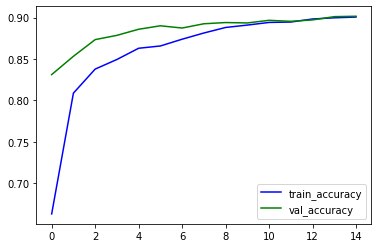

In [ ]:
hist=vgghist.history
plt.plot(hist["accuracy"],color="b",label="train_accuracy")
plt.plot(hist["val_accuracy"],color="g",label="val_accuracy")
plt.legend(loc="lower right")
plt.show()

In [ ]:
model3.evaluate(val_gen)


128/128 [==============================] - 6s 42ms/step - loss: 0.2634 - accuracy: 0.9016


[0.26344817876815796, 0.9015709161758423]

In [ ]:
model3.evaluate(test_gen)


160/160 [==============================] - 6s 35ms/step - loss: 0.2781 - accuracy: 0.8899


[0.27809983491897583, 0.8898704648017883]

In [ ]:
model.save("my_h5_model1.h5")


In [ ]:
model2.save("my_h5_model2.h5")


In [ ]:
model3.save("my_h5_model3.h5")
